## WHO TB DATA ANALYSIS

### 1. Introduction

WHO provide a rich source of data on TB(Tuberculosis) and the effectiveness of efforts to reduce this burden. However, the available data are often underused. This may reflect the absence of clear guidance on recommended approaches to the analysis of such data. This project is going to address the gap through detailed practical examples of the analysis of TB data.

This project has five major objectives;

   1. To get and analyze descriptive statistics for the WHO TB data set.
   2. To measure the rate of TB(all incurrences) in country population.
   3. To compare the rate of TB incurrence in country population of people living with HIV and those living without HIV.
   4. To analyze the incurrence of TB grouped by Countries and by Region.
   5. To analyze the impact of a countries income group on TB
   6. What is the correct way to determine the incurrence of TB
    
### 2. Abbreviations

    e_inc_num           Estimated number of incident cases (all forms)
    e_pop_num           Estimated total population number
    e_inc_tbhiv_num     Estimated incidence of TB cases who are HIV-positive
    iso3                Country identification abbreviation
    g_whoregion         Country WHO region


###### Loading the necessary packages

In [3]:
# Importing pandas 

import pandas as pd

# Importing matplotlib and setting aeshetics for plotting later

import matplotlib.pyplot as plt
plt.style.use('ggplot')

###### Reading in the WHO TB dataset

In [4]:
#Load the TB dataset
#changing so that data is pulled from Github
all_tb = pd.read_csv ('https://raw.githubusercontent.com/waithiegeni/python_analysis/master/TB_burden_countries_2019-01-11.csv', encoding = 'utf-8')

# Print out the first 5 Rows 

all_tb.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20093756,190.0,123.0,271.0,...,14000,7800,21000,NaN,NaN,NaN,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20966463,189.0,123.0,271.0,...,13000,7600,20000,NaN,NaN,NaN,48.0,26.0,18.0,39.0
2,Afghanistan,AF,AFG,4,EMR,2002,21979923,189.0,122.0,270.0,...,12000,7200,19000,NaN,NaN,NaN,63.0,33.0,23.0,51.0
3,Afghanistan,AF,AFG,4,EMR,2003,23064851,189.0,122.0,270.0,...,13000,7700,20000,NaN,NaN,NaN,60.0,32.0,22.0,49.0
4,Afghanistan,AF,AFG,4,EMR,2004,24118979,189.0,122.0,270.0,...,12000,7200,19000,NaN,NaN,NaN,76.0,40.0,28.0,62.0


In [5]:
# print out the last 5 rows
all_tb.tail()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
3845,Zimbabwe,ZW,ZWE,716,AFR,2013,15054506,304.0,228.0,391.0,...,11000,8000,14000,NaN,NaN,NaN,219.0,72.0,56.0,96.0
3846,Zimbabwe,ZW,ZWE,716,AFR,2014,15411675,278.0,202.0,366.0,...,11000,7800,14000,NaN,NaN,NaN,192.0,69.0,53.0,95.0
3847,Zimbabwe,ZW,ZWE,716,AFR,2015,15777451,242.0,179.0,314.0,...,9000,6800,11000,NaN,NaN,NaN,171.0,71.0,55.0,96.0
3848,Zimbabwe,ZW,ZWE,716,AFR,2016,16150362,233.0,173.0,302.0,...,8700,6500,11000,NaN,NaN,NaN,165.0,71.0,55.0,96.0
3849,Zimbabwe,ZW,ZWE,716,AFR,2017,16529904,221.0,164.0,287.0,...,8300,6300,11000,0.23,0.15,0.32,156.0,71.0,55.0,96.0


In [6]:
# Getting the shape of our data

all_tb.shape

(3850, 47)

###### Getting an overview of the data

We notice that the previous calls returns all the columns of the dataset. We want to produce specific and clear-cut descriptive analysis of the data. Therefore, we will select only the columns we need.

In [7]:
# Select the columns required to do descriptive stats of the data 'e_inc_tbhiv_num'

all_tb = all_tb[['country','year','e_inc_num','e_pop_num', 'e_inc_tbhiv_num', 'iso3', 'g_whoregion']]

all_tb[['country','year','e_inc_num','e_pop_num']].head()

,country,year,e_inc_num,e_pop_num
0,Afghanistan,2000,38000,20093756
1,Afghanistan,2001,40000,20966463
2,Afghanistan,2002,42000,21979923
3,Afghanistan,2003,44000,23064851
4,Afghanistan,2004,46000,24118979


###### Doing basic descriptive statistics on our data

Now that we know our dataset has 3850 records, we need to do basic descriptive statistics to understand it and reveal insights that we cannot get any other way. By doing so we will measure the central tendency which answers the question "What does the middle of our data look like?" and by also getting the measure of our spread, which answers the question "How much does my data vary?"

In [8]:
#Doing summary statistics on e_inc_num and e_pop_num
all_tb[["e_inc_num", "e_pop_num"]].describe().round()

,e_inc_num,e_pop_num
count,3850.0,3.850000e+03
mean,49457.0,3.185015e+07
std,235495.0,1.275250e+08
min,0.0,1.126000e+03
25%,220.0,7.241050e+05
50%,3000.0,5.613306e+06
75%,17000.0,2.019158e+07
max,3190000.0,1.409517e+09


In [9]:
# Getting the sum of all TB incurrences and sum of population
all_tb[['e_inc_num', 'e_pop_num']].sum().round()

e_inc_num       190409887
e_pop_num    122623062812
dtype: int64

In [10]:
# Getting the number of countries 
len(all_tb ['country'].unique())

218

In [11]:
# Checking the correlation of our attributes in the dataset
all_tb[['e_inc_num', 'e_pop_num']].corr(method = 'pearson')

,e_inc_num,e_pop_num
e_inc_num,1.000000,0.841395
e_pop_num,0.841395,1.000000


In [12]:
# Grouping and aggregating by year

all_tb_grouped = all_tb.groupby(['year']).e_inc_num.agg(['sum','max','min'])
all_tb_grouped

,sum,max,min
year,,,
2000,10413551,3040000,0
2001,10548676,3090000,0
2002,10656217,3130000,0
2003,10775332,3160000,0
2004,10831371,3180000,0
2005,10868086,3190000,0
2006,10863890,3180000,0
2007,10831962,3160000,0
2008,10791597,3130000,0


This was just a selection of the descriptive statistics that are useful for us to get the rate of TB in country population. We have established out of our 3850 records, we have 218 countries, the total incurrence of TB in the world was at an all time high in 2005. However, this has gradually reduced over the years, reporting an all time low incurrence currently.

### 3. Getting the percentage rate of TB(all incurrences) in country population.

We can get the percentage rate of TB using the following formula;

       % Rate of TB =  (TB incurrence)/(Population) * 100

In [13]:
# Divide number of incident cases with the poplulation and create new column 

all_tb['perc_rate_tb'] = (all_tb['e_inc_num']/all_tb['e_pop_num'] * 100) . round(2)
all_tb . head()

,country,year,e_inc_num,e_pop_num,e_inc_tbhiv_num,iso3,g_whoregion,perc_rate_tb
0,Afghanistan,2000,38000,20093756,110.0,AFG,EMR,0.19
1,Afghanistan,2001,40000,20966463,100.0,AFG,EMR,0.19
2,Afghanistan,2002,42000,21979923,95.0,AFG,EMR,0.19
3,Afghanistan,2003,44000,23064851,92.0,AFG,EMR,0.19
4,Afghanistan,2004,46000,24118979,95.0,AFG,EMR,0.19


In [14]:
# Grouping data by year 

summary_tb = all_tb.groupby (['country']).perc_rate_tb.mean()
summary_tb.head()

country
Afghanistan       0.190000
Albania           0.020000
Algeria           0.075000
American Samoa    0.009444
Andorra           0.011667
Name: perc_rate_tb, dtype: float64

Now that we have grouped our data by country , we can actually now sort the rate of TB to see which country has the highest and lowest rate in TB

In [15]:
# sorting the rate of TB in ascending order 

summary_tb.sort_values(ascending = False).head(10) #10 highest

country
Lesotho                     1.055556
South Africa                0.828333
Eswatini                    0.768333
Namibia                     0.697778
Botswana                    0.596111
Central African Republic    0.590556
Gabon                       0.556667
Philippines                 0.546667
Zambia                      0.537222
Mozambique                  0.534444
Name: perc_rate_tb, dtype: float64

In [16]:
# Getting countries reporting 0% rate in TB

no_tb =summary_tb[summary_tb == 0.0]
no_tb

country
Bonaire, Saint Eustatius and Saba    0.0
Monaco                               0.0
San Marino                           0.0
United Arab Emirates                 0.0
West Bank and Gaza Strip             0.0
Name: perc_rate_tb, dtype: float64

###### Insights

  1. Only 5 countries report at least a 0% rate in TB
  2. 9 out of the 10 countries with the highest rate are from Africa , which is safe to say Africa has the highest rate incurrence in TB
 


###### Plotting our percentage rate of inccurrence

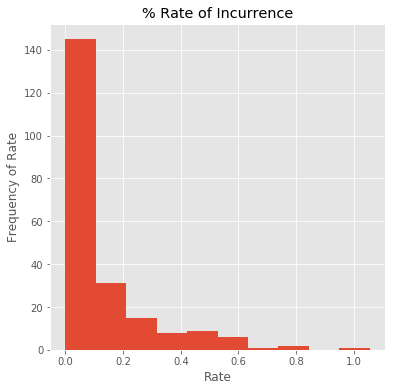

In [17]:
# plotting the data
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis
summary_tb.plot.hist()
ax.set_title('% Rate of Incurrence') # Give the plot a main title
ax.set_xlabel("Rate") # Set text for the x axis
ax.set_ylabel("Frequency of Rate") # Set text for the x axis
plt.show()


Well, this is somewhat good news. We can see that the % rate of TB incurrence lies between 0 - 0.2% over time. Now let's break it down further and compare this rate with those people living with both TB and HIV.

### 4. Comparing the rate of TB incurrence in country population of people living with HIV and those living without HIV

###### Doing basic stats on the HIV data

In [18]:
# Select the necessary columns and do a describe
tb_hiv_all = all_tb.copy()

tb_hiv_all[['country','e_inc_tbhiv_num','e_inc_num']].describe().round()

,e_inc_tbhiv_num,e_inc_num
count,3531.0,3850.0
mean,6510.0,49457.0
std,26063.0,235495.0
min,0.0,0.0
25%,7.0,220.0
50%,120.0,3000.0
75%,1350.0,17000.0
max,308000.0,3190000.0


Outrightly we can already tell that there are null values in the e_inc_tbhiv_num column. Keeping in mind that a null value != 0 (zero). Let's drop columns with null values in order for us to get a more accurate analysis

In [19]:
#drop null values and reset index

tb_hiv_all = tb_hiv_all.dropna().reset_index()
tb_hiv_all.count()

index              3531
country            3531
year               3531
e_inc_num          3531
e_pop_num          3531
e_inc_tbhiv_num    3531
iso3               3531
g_whoregion        3531
perc_rate_tb       3531
dtype: int64

For us to be able to compare the rate of people with TB living with HIV and those who don't live with HIV, we will need to create a new column for those living without HIV. Which is simply;

                    e_inc_num - e_inc_tbhiv_num 

In [20]:
# create a new column with people with TB without HIV 

tb_hiv_all['tb_hiv_neg'] = tb_hiv_all['e_inc_num'] - tb_hiv_all['e_inc_tbhiv_num']

In [21]:
tb_hiv_all.head()

,index,country,year,e_inc_num,e_pop_num,e_inc_tbhiv_num,iso3,g_whoregion,perc_rate_tb,tb_hiv_neg
0,0,Afghanistan,2000,38000,20093756,110.0,AFG,EMR,0.19,37890.0
1,1,Afghanistan,2001,40000,20966463,100.0,AFG,EMR,0.19,39900.0
2,2,Afghanistan,2002,42000,21979923,95.0,AFG,EMR,0.19,41905.0
3,3,Afghanistan,2003,44000,23064851,92.0,AFG,EMR,0.19,43908.0
4,4,Afghanistan,2004,46000,24118979,95.0,AFG,EMR,0.19,45905.0


###### Plotting our results to compare TB with HIV and those without HIV

We are going to plot how 'tb_hiv_neg', and 'e_inc_tbhiv_num' are distributed, to do so we are going to plot density plots.

Text(0.5, 1.0, 'Density plot of TB Incurrences for HIV Negative People')

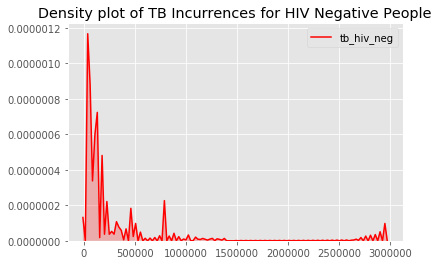

In [69]:
#importing seaborn
import seaborn as sns

#getting columns to plot density  plot for
tb_hiv_all_plot = tb_hiv_all[['tb_hiv_neg','e_inc_tbhiv_num']]

#plotting the density plots
p1=sns.kdeplot(tb_hiv_all['tb_hiv_neg'], shade=True, color="r")
p1.set_title("Density plot of TB Incurrences for HIV Negative People")

The density plot shows how the values are distributed across the continuous interval. It can be seen that incurrences of TB for people with HIV are concentrated between 0 - 10,000 incurrences.

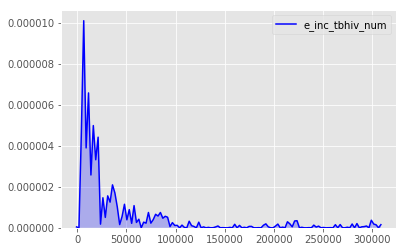

In [67]:
#checking on density 
p1=sns.kdeplot(tb_hiv_all['e_inc_tbhiv_num'], shade=True, color="b")


While the plot above is informative, we can compare two different countries to get a much better, closer comparison. let's take Kenya and Uganda in our example

In [23]:
# box plot for two countries, same variable

box_plot_kenya = tb_hiv_all.loc[tb_hiv_all['country'] == "Kenya", ['e_inc_num','year']]

box_plot_ug = tb_hiv_all.loc[tb_hiv_all['country'] == "Uganda", ['e_inc_num', 'year']]

In [24]:
# combined dataset
combine_dataset = pd.merge(box_plot_kenya, box_plot_ug, on = ['year'], how = 'inner')
combine_dataset.head()

,e_inc_num_x,year,e_inc_num_y
0,142000,2000,66000
1,161000,2001,66000
2,177000,2002,66000
3,208000,2003,66000
4,222000,2004,66000


In [25]:
#Rename series
combine_dataset.rename(columns = {"e_inc_num_x":"Kenya", "e_inc_num_y":"Uganda"}, inplace = True)
combine_dataset.tail()

,Kenya,year,Uganda
13,199000,2013,76000
14,195000,2014,79000
15,180000,2015,81000
16,169000,2016,83000
17,158000,2017,86000


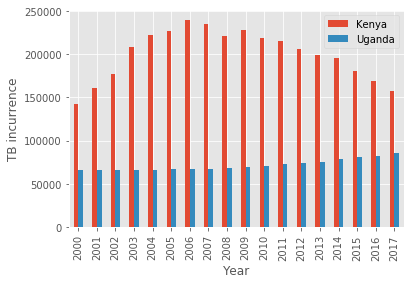

In [26]:
combine_dataset.plot(x = 'year', kind='bar')
plt.ylabel('TB incurrence')
plt.xlabel('Year')
plt.show()

In [27]:
# drop year column
combine_dataset = combine_dataset.drop("year", axis = 1)
combine_dataset.head()

,Kenya,Uganda
0,142000,66000
1,161000,66000
2,177000,66000
3,208000,66000
4,222000,66000


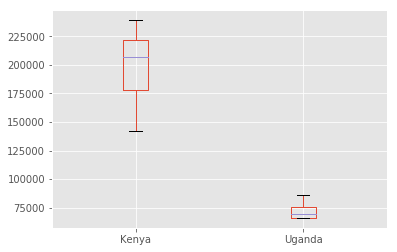

In [28]:
#plot box plot
combine_dataset.plot.box()
plt.show()

That looks much better. We can easily see the variance between Kenya and Uganda . However, plotting the entire data seemed completely crammed when viewing the comparison for all 218 countries in our dataset. it's our objective to show these comparisons either way. Therefore, that will be our next objective.

### 5. Analyzing the incurrence of TB on the world's different income classes

First we need to import the current GDP data that's on a seperate table and then merge it to our initial TB dataset for us to get the income groups.

In [29]:
# Importing numpy

import numpy as np 
all_gdp_data = pd.read_csv ('https://raw.githubusercontent.com/waithiegeni/python_analysis/master/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_10515199.csv', encoding = 'utf-8')

In [30]:
# Select only the necessary columns needed on the TB dataset

all_tb_data = all_tb[['country','iso3', 'e_inc_num', 'e_pop_num']]
all_tb_data.head()

,country,iso3,e_inc_num,e_pop_num
0,Afghanistan,AFG,38000,20093756
1,Afghanistan,AFG,40000,20966463
2,Afghanistan,AFG,42000,21979923
3,Afghanistan,AFG,44000,23064851
4,Afghanistan,AFG,46000,24118979


In [31]:
# Drop duplicates on the TB data

all_tb_data = all_tb_data.drop_duplicates(subset = ['country'])
all_tb_data.count()

country      218
iso3         218
e_inc_num    218
e_pop_num    218
dtype: int64

In [32]:
# Selecting necessary columns from the gdp dataset

all_gdp_data = all_gdp_data[['Country Code','IncomeGroup']]
all_gdp_data.head()

,Country Code,IncomeGroup
0,ABW,High income
1,AFG,Low income
2,AGO,Lower middle income
3,ALB,Upper middle income
4,AND,High income


So in our GDP dataset you'll notice that the data in the "country code" is the same as that in the "iso3" column on the tb dataset. This is the key column that we'll use to help us merge the data to one table.

In [33]:
# renaming country code 

all_gdp_data.rename(columns = {"Country Code": "iso3"}, inplace = True )
all_gdp_data.head()

,iso3,IncomeGroup
0,ABW,High income
1,AFG,Low income
2,AGO,Lower middle income
3,ALB,Upper middle income
4,AND,High income


In [34]:
# merging TB data with GDP data

merged_data = pd.merge(all_tb_data,all_gdp_data, on = ['iso3'])
merged_data.count()

country        209
iso3           209
e_inc_num      209
e_pop_num      209
IncomeGroup    209
dtype: int64

We notice after merging the data that the count has dropped from 218 to 209, we need to find out which of the 9 countries were omitted during the merge.

In [35]:
#countries not included on income data
not_included = pd.merge(all_tb_data, merged_data, on = ['iso3'], how = "left", indicator = True)

not_included = not_included.loc[not_included["_merge"] == "left_only"]
not_included

,country_x,iso3,e_inc_num_x,e_pop_num_x,country_y,e_inc_num_y,e_pop_num_y,IncomeGroup,_merge
6,Anguilla,AIA,2,11070,NaN,NaN,NaN,NaN,left_only
25,"Bonaire, Saint Eustatius and Saba",BES,0,20940,NaN,NaN,NaN,NaN,left_only
48,Cook Islands,COK,1,18122,NaN,NaN,NaN,NaN,left_only
128,Montserrat,MSR,0,4955,NaN,NaN,NaN,NaN,left_only
135,Netherlands Antilles,ANT,6,178311,NaN,NaN,NaN,NaN,left_only
142,Niue,NIU,0,1899,NaN,NaN,NaN,NaN,left_only
170,Serbia & Montenegro,SCG,3300,10101175,NaN,NaN,NaN,NaN,left_only
194,Tokelau,TKL,0,1554,NaN,NaN,NaN,NaN,left_only
213,Wallis and Futuna Islands,WLF,2,14500,NaN,NaN,NaN,NaN,left_only


In [36]:
len(not_included)

9

In [37]:
# looking at our merged data

merged_data.head()

,country,iso3,e_inc_num,e_pop_num,IncomeGroup
0,Afghanistan,AFG,38000,20093756,Low income
1,Albania,ALB,690,3121970,Upper middle income
2,Algeria,DZA,23000,31183660,Upper middle income
3,American Samoa,ASM,3,57521,Upper middle income
4,Andorra,AND,14,65390,High income


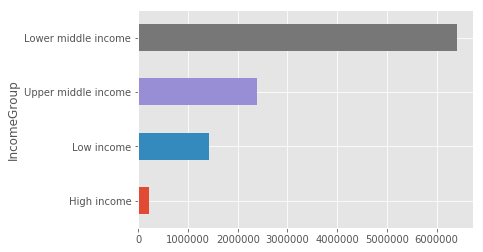

In [38]:
# plotting the data

merged_data.groupby('IncomeGroup')['e_inc_num'].sum().sort_values().plot(kind='barh')
plt.show()

Well, this is interesting, i expected the low income group to record a higher incurrence in TB, so let's check and see whether the population has skewed these results


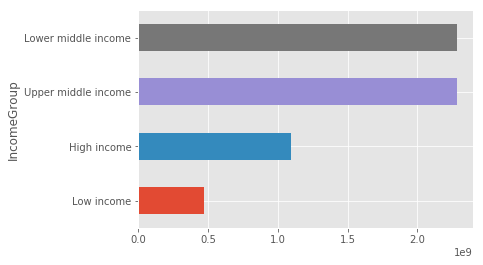

In [39]:
# Plotting the population 

merged_data.groupby('IncomeGroup')['e_pop_num'].sum().sort_values().plot(kind='barh')
plt.show()

While the population has definitely skewed the results for the middle income countries, we can still say that income has an effect on TB. High income countries have a lower poplution than the low income countries but they still record a lower rate in TB.

Let's get the rate of incurrence per region. We need to note though that the UN categorize countries not in continets but in regions, which is what we call the WHO regions. We will need to group the countries to these regions and determine their order of incurrence.

### 6. Analyzing the incurrence of TB in WHO Regions

In [40]:
# selecting necessary columns
all_tb = all_tb[['country', 'year' , 'g_whoregion', 'e_inc_num', 'e_pop_num', 'perc_rate_tb']]
all_tb.head()

,country,year,g_whoregion,e_inc_num,e_pop_num,perc_rate_tb
0,Afghanistan,2000,EMR,38000,20093756,0.19
1,Afghanistan,2001,EMR,40000,20966463,0.19
2,Afghanistan,2002,EMR,42000,21979923,0.19
3,Afghanistan,2003,EMR,44000,23064851,0.19
4,Afghanistan,2004,EMR,46000,24118979,0.19


In [41]:
# Grouping by country

all_tb_group = all_tb.groupby(['country', 'g_whoregion'] ).perc_rate_tb.mean().reset_index()
all_tb_group.head()

,country,g_whoregion,perc_rate_tb
0,Afghanistan,EMR,0.190000
1,Albania,EUR,0.020000
2,Algeria,AFR,0.075000
3,American Samoa,WPR,0.009444
4,Andorra,EUR,0.011667


In [42]:
#rename columns 

all_tb_group.rename(columns = {"g_whoregion": "WHO_Regions"}, inplace = True )
all_tb_group.head()

,country,WHO_Regions,perc_rate_tb
0,Afghanistan,EMR,0.190000
1,Albania,EUR,0.020000
2,Algeria,AFR,0.075000
3,American Samoa,WPR,0.009444
4,Andorra,EUR,0.011667


In [43]:
# Grouping by Regions

summary = all_tb_group.groupby('WHO_Regions')['perc_rate_tb'].sum()
summary

WHO_Regions
AFR    13.875397
AMR     1.460972
EMR     1.843889
EUR     2.366009
SEA     2.877014
WPR     4.535000
Name: perc_rate_tb, dtype: float64

In [44]:
#Import matplotlib patches 

import matplotlib.patches as mpatches

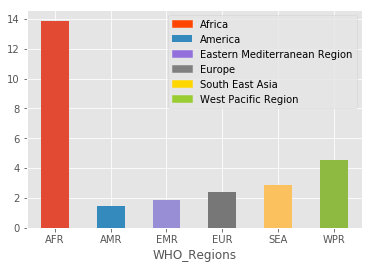

In [45]:
# Plotting the results

summary.plot(kind='bar', rot = 0)
AFR = mpatches.Patch(color = 'orangered',label='Africa')
AMR = mpatches.Patch(label='America')
EMR = mpatches.Patch(color = 'mediumpurple',label='Eastern Mediterranean Region')
EUR = mpatches.Patch(color = 'grey', label='Europe')
SEA = mpatches.Patch(color = 'gold',label='South East Asia')
WPR = mpatches.Patch(color = 'yellowgreen',label='West Pacific Region')
plt.legend(handles=[AFR,AMR,EMR,EUR,SEA,WPR], loc=1)
plt.show()

We can definitely see that Africa has the highest incurrence in TB and America has the lowest incurrence in TB. This was an expected result though.

Let's break it down and see the countries in these regions and how they rank. let's answer the question "Which are these countries in each region with the highest rates?"

### Rate of Incurrence per country in each region

In [46]:
#select countries in Africa region

all_afr = all_tb.loc[all_tb['g_whoregion'] == 'AFR', ['year', 'country', 'perc_rate_tb']]
all_afr.count()

year            835
country         835
perc_rate_tb    835
dtype: int64

In [47]:
#group by country

afr_summary = all_afr.groupby('country')['perc_rate_tb'].mean().sort_values()
afr_summary.count()

47

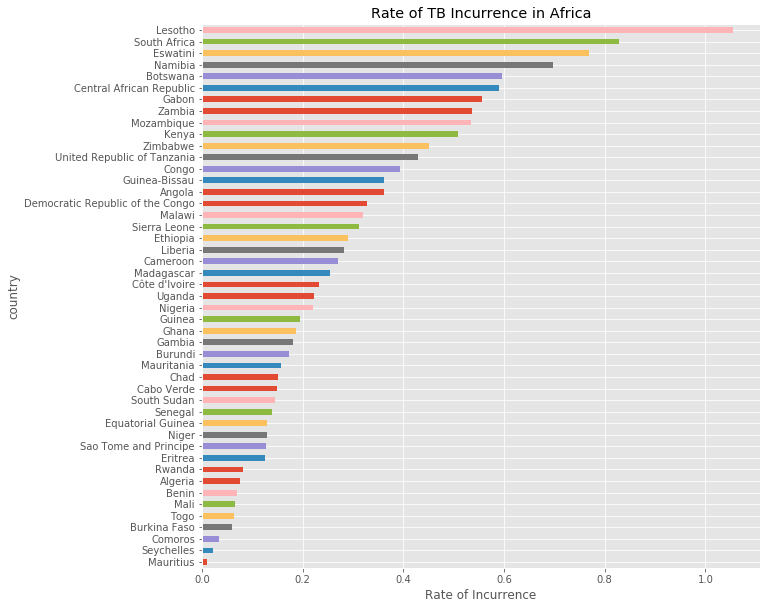

In [48]:
# Plotting the countries 

afr_summary.plot(kind='barh', figsize=(10,10))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in Africa')
plt.show()

In [49]:
#select countries in West Pacific region

all_wpr = all_tb.loc[all_tb['g_whoregion']=='WPR',['year', 'country', 'perc_rate_tb']]

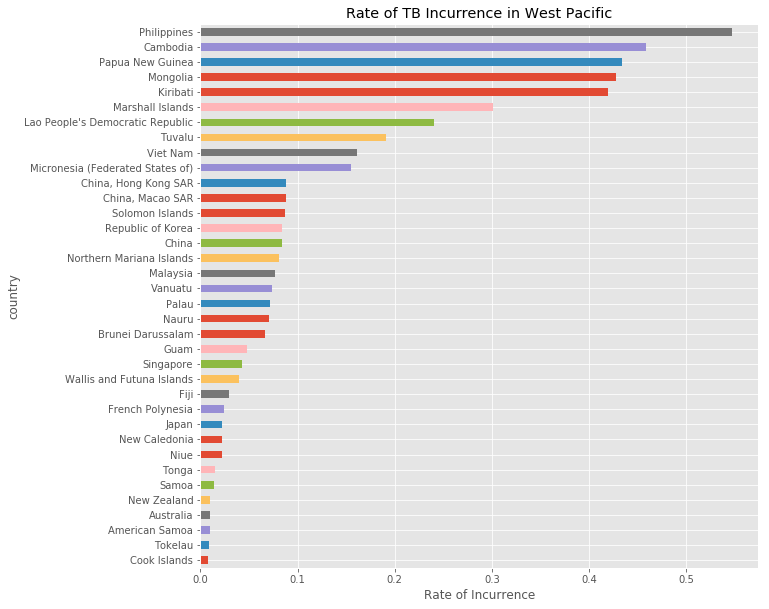

In [50]:
# Plotting the figures

all_wpr.groupby('country')['perc_rate_tb'].mean().sort_values().plot(kind='barh', figsize=(10,10))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in West Pacific')
plt.show()


In [51]:
#select countries in South East Asia region

all_sea = all_tb.loc[all_tb['g_whoregion']=='SEA',['year', 'country', 'perc_rate_tb']]


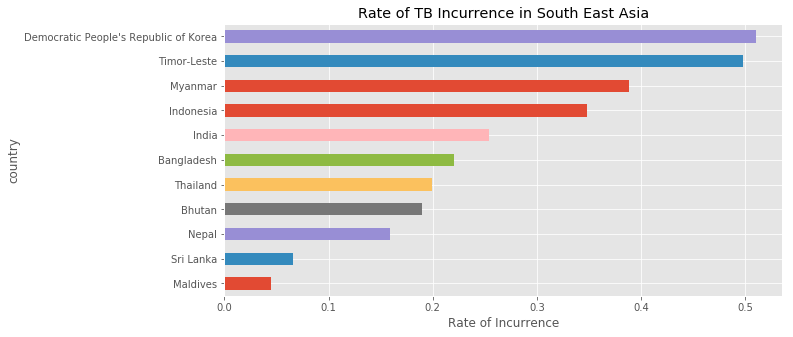

In [52]:
# Plotting the figures 

all_sea.groupby('country')['perc_rate_tb'].mean().sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in South East Asia')
plt.show()

In [53]:
#select countries in Europe region

all_eur = all_tb.loc[all_tb['g_whoregion']=='EUR',['year', 'country', 'perc_rate_tb']]

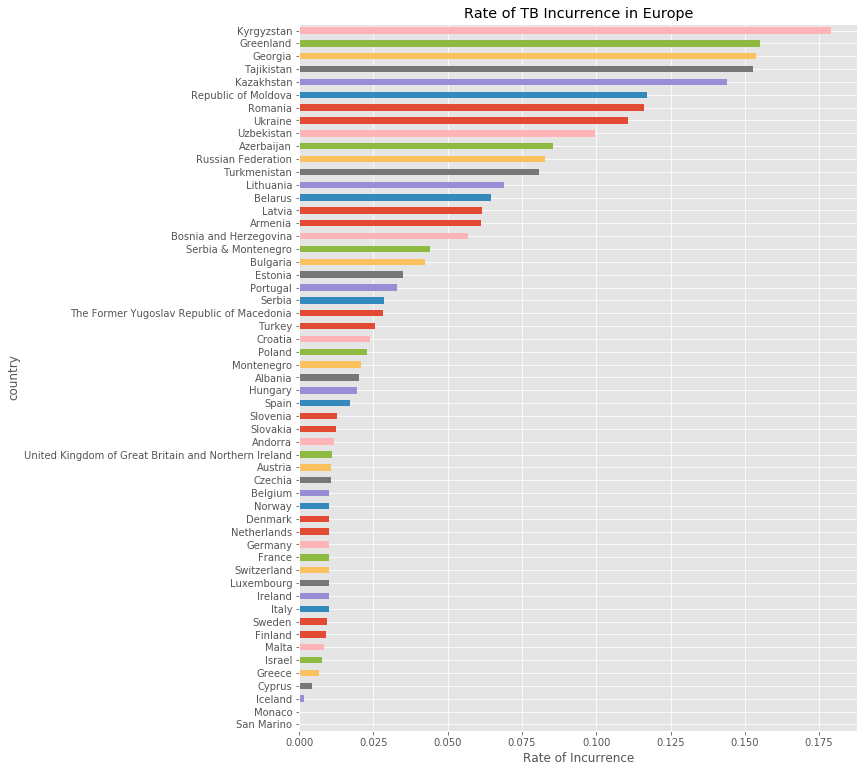

In [54]:
# Plotting the figures 

all_eur.groupby('country')['perc_rate_tb'].mean().sort_values().plot(kind='barh', figsize=(10,13))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in Europe')
plt.show()


In [55]:
#select countries in Eastern Mediterranean Region region

all_emr = all_tb.loc[all_tb['g_whoregion']=='EMR',['year', 'country', 'perc_rate_tb']]


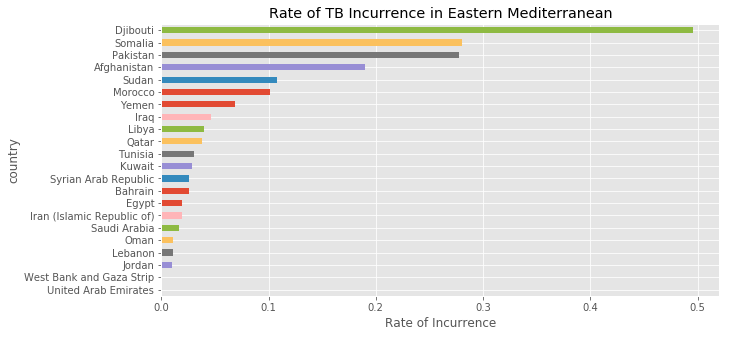

In [56]:
#Plotting the figures 

all_emr.groupby('country')['perc_rate_tb'].mean().sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in Eastern Mediterranean')
plt.show()


In [57]:
#select countries in America region

all_amr = all_tb.loc[all_tb['g_whoregion']=='AMR',['year', 'country', 'perc_rate_tb']]

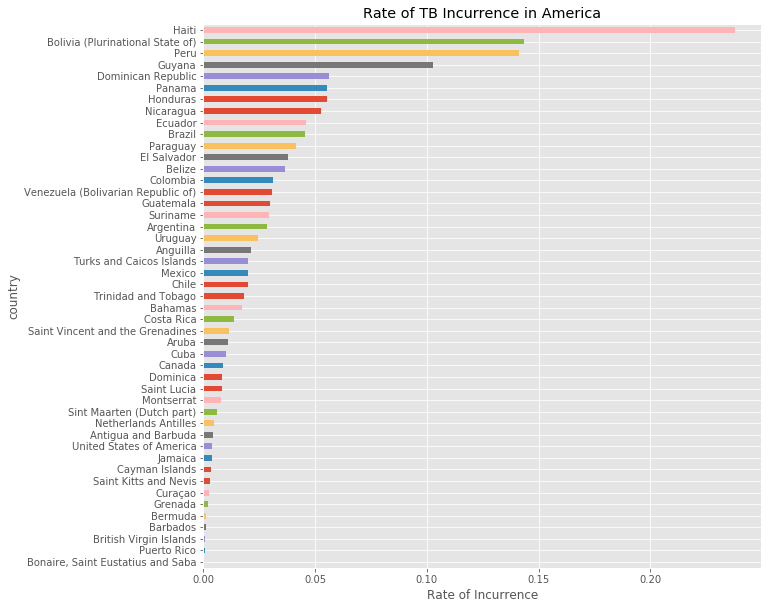

In [58]:
# plotting the figures

all_amr.groupby('country')['perc_rate_tb'].mean().sort_values().plot(kind='barh', figsize=(10,10))
plt.xlabel('Rate of Incurrence')
plt.title('Rate of TB Incurrence in America')
plt.show()


### 7. Top 10 Countries with highest incurrence in TB

We had already worked on the rates earlier so we'll just run that again. Though this seems repetitive you'll see the objective shorty. We want to compare this with TB incurrence exclusive of population.

In [59]:
# highest Tb rate against population
highest_tb = summary_tb. sort_values(ascending = False).head(10) #remove head to see entire
highest_tb

country
Lesotho                     1.055556
South Africa                0.828333
Eswatini                    0.768333
Namibia                     0.697778
Botswana                    0.596111
Central African Republic    0.590556
Gabon                       0.556667
Philippines                 0.546667
Zambia                      0.537222
Mozambique                  0.534444
Name: perc_rate_tb, dtype: float64

In [60]:
# highest TB incurrence exclusive of population 

high_all_tb = all_tb[['country', 'year', 'e_inc_num']]

# Group by Country

high_tb_inc = high_all_tb.groupby('country').e_inc_num.mean().round().sort_values(ascending = False)


summary_high_tb = high_tb_inc.head(10)
summary_high_tb


country
India                               3029444.0
China                               1116000.0
Indonesia                            821944.0
Philippines                          499833.0
Pakistan                             455389.0
South Africa                         421278.0
Nigeria                              337222.0
Bangladesh                           330000.0
Ethiopia                             237556.0
Democratic Republic of the Congo     203389.0
Name: e_inc_num, dtype: float64

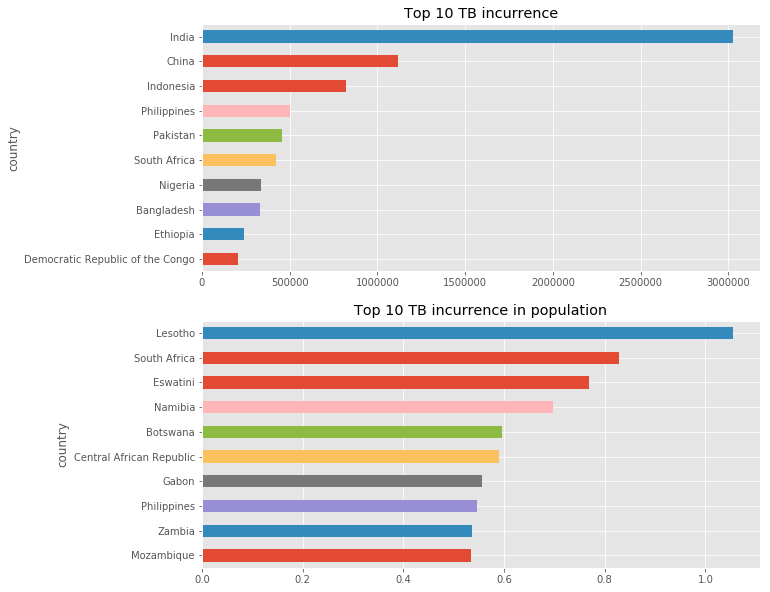

In [61]:
#Combined subplots
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

summary_high_tb. sort_values().plot(kind='barh', title = 'Top 10 TB incurrence', ax=ax1, figsize=(10,10))
highest_tb.sort_values().plot(kind='barh', title = 'Top 10 TB incurrence in population', ax=ax2, figsize=(10,10))
plt.show()


You would wonder why we have done this comparison.If you happen to google the countries with the highest rate in TB you will always get India and China as the top, this is because they have the highest population in the world. However, this is a flawed way of determining the rate of TB . We should always consider a countries population when determing the rate of TB, otherwise India and China will always be the top countries with TB, which has been the case over time. For example, vatican city has a population of 1000, if hypothetically speaking ,500 of them had TB that would mean 50% of the city is living with TB which is a serious case. However, if we consider the incurrence without factoring the population a 500 incurrence would be at the bottom of the barrel compared to india with an incurrence of 3,000,000. 


If we actually factor in population, we will see where India and China actually lie in the list.

In [62]:
# index location of China in the list 
summary_tb.sort_values(ascending = False).index.get_loc("China")

81

In [63]:
# index location of India in the list 
summary_tb.sort_values(ascending = False).index.get_loc("India")

35

You can see that China and India now rank as the 82nd and 36th country respectivey. Which means that there are actually countries that really need to be looked into with more weight . In our graph with the Top 10 countries with the highest rate in TB, we can see that if we factor in population,  9/10 are countries from Africa. This insight also helps us know how funding should be allocated. 

Just one thing left, let's look at where Lesotho used to lie if we didn't factor in its population.

In [64]:
high_tb_inc.sort_values(ascending = False).index.get_loc('Lesotho')

47

While Lesotho is the 48th country with the highest rate in TB without conisdering its population , we can see how it can easily be overlooked when trying to curb TB. Yet in our analysis it's the country with the highest rate in TB.

### 8. Conclusion

So we've made it to the end and we've found out very many key insights in our analysis. But more importantly we have established the correct way in getting the incurrence of TB and why it's important to consider population when getting the rate of TB incurrence. It's a more accurate approach in our global fight in ending TB. So let's look into these top countries as a start in fighting TB.

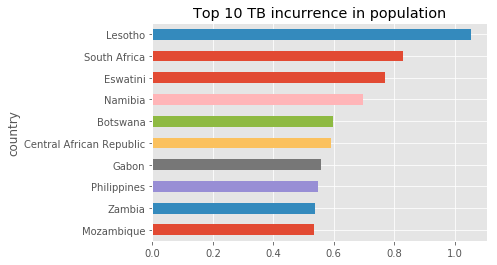

Here is a link to the project's dashboard

https://app.powerbi.com/view?r=eyJrIjoiZTgwZmYyMTctZTc4Yi00NzZkLWE1MDEtMmNkYTY4MWFiZjMzIiwidCI6IjhjOWU0M2I1LWMxMzEtNGMzMS1iYzQ3LTBlYzc2YjU3ZGJhZSIsImMiOjl9